## Data Project - Insight from failed orders

In [3]:
import pandas as pd

In [4]:
orders = pd.read_csv("data_orders.csv")

In [5]:
orders.shape

(10716, 8)

In [6]:
orders.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


In [7]:
orders.sample(n=10, random_state=42)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
10309,00:29:14,-0.966062,51.454821,NaN,3000555146103,4,0,44.0
6705,01:28:45,-0.970472,51.456725,NaN,3000595870644,4,0,121.0
304,08:22:36,-0.916708,51.439852,NaN,3000627783633,9,0,NaN
9143,07:32:27,-0.955580,51.453493,1078.0,3000622140805,4,1,1017.0
10593,04:39:55,-0.946358,51.439779,NaN,3000554645524,4,0,121.0
8654,08:05:02,-0.967327,51.449395,598.0,3000592772077,4,1,48.0
3919,00:21:47,-0.971597,51.457574,NaN,3000624492441,4,0,180.0
4337,20:26:40,-0.971296,51.458115,NaN,3000628755869,4,0,104.0
6931,07:25:39,-0.942301,51.474812,NaN,3000628430595,4,0,44.0
967,13:41:31,-0.952194,51.444067,NaN,3000623591189,9,0,NaN


In [8]:
offers = pd.read_csv("data_offers.csv")

In [9]:
offers.shape

(334363, 2)

In [10]:
offers.sample(n=10, random_state=42)

,order_gk,offer_id
244971,3000627481054,300052086404
236783,3000631282042,300052342376
22714,3000624367715,300051909011
306983,3000557436646,300050769980
170256,3000588131807,300051201442
316173,3000629756224,300052250019
234398,3000625018320,300051967737
122107,3000629082264,300052196687
60909,3000588606991,300051225443
52998,3000629981908,300052274857


In [11]:
df = orders.merge(right=offers, how="inner", on="order_gk")

In [12]:
df.sample(n=10, random_state=42)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
30194,21:15:35,-0.969588,51.455780,299.0,3000555697076,4,1,223.0,300050725946
14748,10:13:35,-0.955958,51.430362,NaN,3000626091676,4,0,91.0,300052014519
29083,09:16:38,-1.033560,51.441967,NaN,3000594099225,4,0,68.0,300051458740
16926,02:08:09,-0.967676,51.444489,NaN,3000626980467,4,0,125.0,300052031394
21530,21:44:21,-0.972683,51.456762,NaN,3000554421440,4,0,11.0,300050671163
13008,03:03:45,-0.966745,51.453236,NaN,3000593295623,9,0,NaN,300051413313
2034,14:41:22,-0.948642,51.449587,NaN,3000584916226,4,0,6.0,300051090742
2229,20:54:03,-0.991382,51.476339,NaN,3000585716553,9,0,NaN,300051125957
16632,18:06:17,-0.948907,51.444643,NaN,3000627382471,4,0,113.0,300052078801
18189,07:52:29,-0.973793,51.458665,479.0,3000587781360,4,1,47.0,300051178628


In [13]:
import numpy as np

df['is_driver_assigned'] = np.where(df["is_driver_assigned_key"] ==1, "Yes", "No")
df['order_status'] = np.where(df["order_status_key"] == 4, "Client Cancelled", "System Reject")

df.drop(columns = ["is_driver_assigned_key", "order_status_key"], inplace=True)

In [14]:
df = df.rename(columns={
    "order_datetime": "order_time"
})

In [15]:
df.sample(n=10, random_state=42)

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status
30194,21:15:35,-0.969588,51.455780,299.0,3000555697076,223.0,300050725946,Yes,Client Cancelled
14748,10:13:35,-0.955958,51.430362,NaN,3000626091676,91.0,300052014519,No,Client Cancelled
29083,09:16:38,-1.033560,51.441967,NaN,3000594099225,68.0,300051458740,No,Client Cancelled
16926,02:08:09,-0.967676,51.444489,NaN,3000626980467,125.0,300052031394,No,Client Cancelled
21530,21:44:21,-0.972683,51.456762,NaN,3000554421440,11.0,300050671163,No,Client Cancelled
13008,03:03:45,-0.966745,51.453236,NaN,3000593295623,NaN,300051413313,No,System Reject
2034,14:41:22,-0.948642,51.449587,NaN,3000584916226,6.0,300051090742,No,Client Cancelled
2229,20:54:03,-0.991382,51.476339,NaN,3000585716553,NaN,300051125957,No,System Reject
16632,18:06:17,-0.948907,51.444643,NaN,3000627382471,113.0,300052078801,No,Client Cancelled
18189,07:52:29,-0.973793,51.458665,479.0,3000587781360,47.0,300051178628,Yes,Client Cancelled


### Plot orders according to reasons for failure

In [16]:
df.groupby(by=["is_driver_assigned", "order_status"])["order_gk"].count()

is_driver_assigned  order_status    
No                  Client Cancelled    13435
                    System Reject        9469
Yes                 Client Cancelled     8360
                    System Reject           4
Name: order_gk, dtype: int64

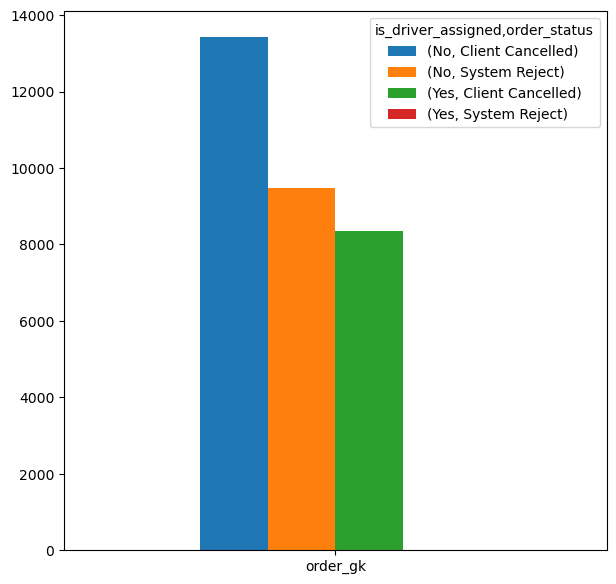

In [17]:
df_q1 = df.pivot_table(columns=["is_driver_assigned", "order_status"], values="order_gk", aggfunc="count")
_ = df_q1.plot(kind="bar", subplots=False, figsize=(7, 7), legend=True, rot=0)

In [18]:
df_q1

is_driver_assigned               No                            Yes  \
order_status       Client Cancelled System Reject Client Cancelled   
order_gk                      13435          9469             8360   

is_driver_assigned                
order_status       System Reject  
order_gk                       4

### Plot the distribution of failed orders by hours

In [19]:
df["order_hours"] = df["order_time"].str.split(":").apply(lambda split: split[0])

In [20]:
df.sample(n=5, random_state= 42)

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status,order_hours
30194,21:15:35,-0.969588,51.455780,299.0,3000555697076,223.0,300050725946,Yes,Client Cancelled,21
14748,10:13:35,-0.955958,51.430362,NaN,3000626091676,91.0,300052014519,No,Client Cancelled,10
29083,09:16:38,-1.033560,51.441967,NaN,3000594099225,68.0,300051458740,No,Client Cancelled,09
16926,02:08:09,-0.967676,51.444489,NaN,3000626980467,125.0,300052031394,No,Client Cancelled,02
21530,21:44:21,-0.972683,51.456762,NaN,3000554421440,11.0,300050671163,No,Client Cancelled,21


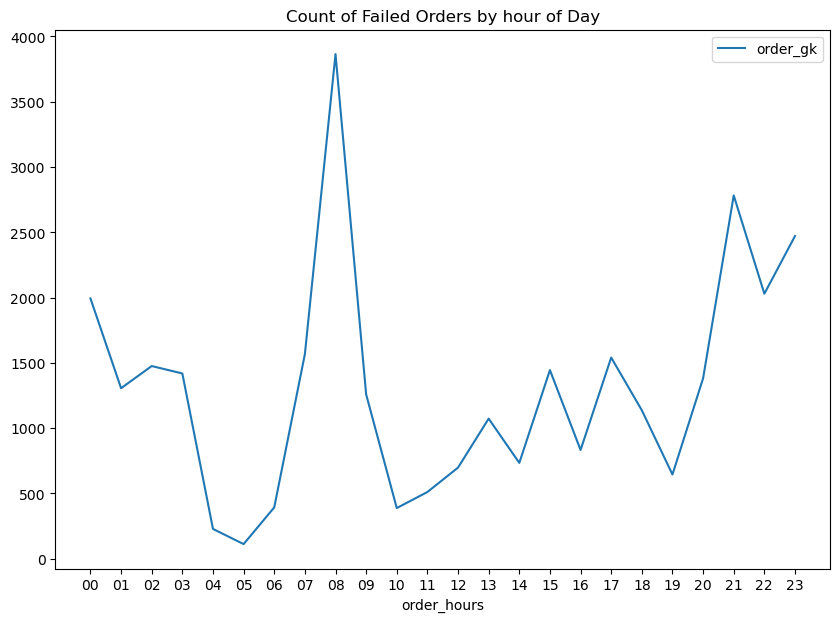

In [21]:
_ = df.groupby(by="order_hours")["order_gk"].count().plot(figsize=(10, 7),
                                                        legend = True,
                                                        xticks = range(0, 24),
                                                        title = "Count of Failed Orders by hour of Day")

In [22]:
grouped_q2 = df.groupby(by=["order_hours", "is_driver_assigned", "order_status"])["order_gk"].count()
grouped_q2

order_hours  is_driver_assigned  order_status    
00           No                  Client Cancelled     957
                                 System Reject        706
             Yes                 Client Cancelled     326
                                 System Reject          4
01           No                  Client Cancelled     633
                                                     ... 
22           No                  System Reject        660
             Yes                 Client Cancelled     415
23           No                  Client Cancelled    1144
                                 System Reject        883
             Yes                 Client Cancelled     444
Name: order_gk, Length: 73, dtype: int64

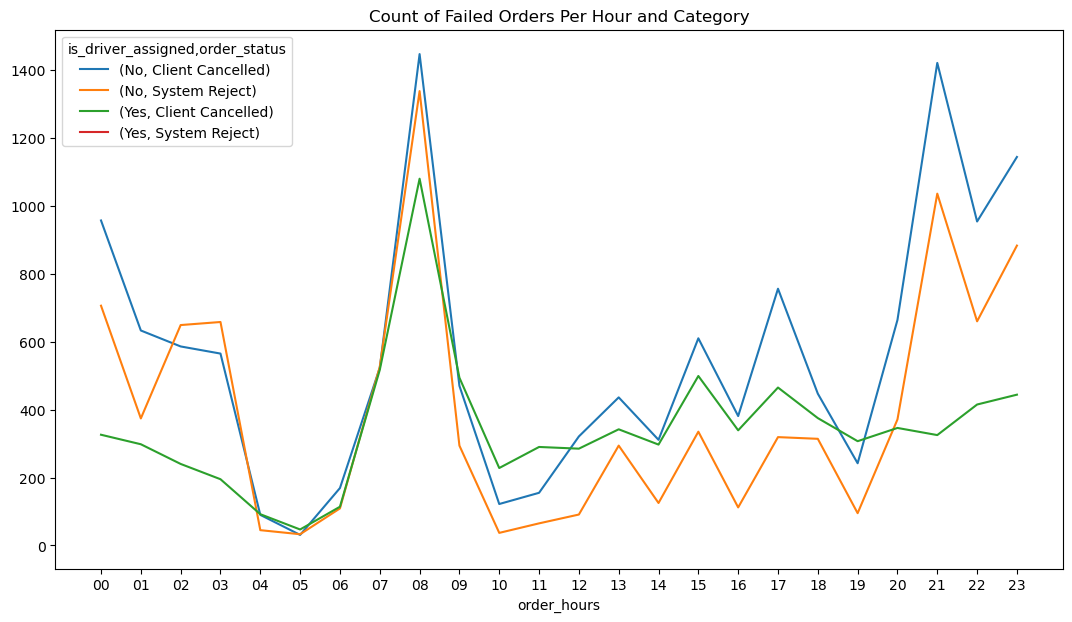

In [23]:
_ = grouped_q2.reset_index().pivot(index="order_hours",
                                   columns=["is_driver_assigned", "order_status"],
                                   values="order_gk").plot(xticks=range(0, 24),
                                                           figsize=(13, 7),
                                                           title="Count of Failed Orders Per Hour and Category")

### Plot the average time to cancellation with and without driver, by hour

In [26]:
grouped_q3 = df.groupby(by=["order_hours", "is_driver_assigned"])["cancellations_time_in_seconds"].mean()
grouped_q3

order_hours  is_driver_assigned
00           No                    115.126437
             Yes                   276.082822
01           No                    100.593997
             Yes                   296.312081
02           No                    121.305461
             Yes                   301.466667
03           No                    129.182301
             Yes                   368.682051
04           No                    100.733333
             Yes                   245.250000
05           No                    102.838710
             Yes                   156.617021
06           No                    202.952663
             Yes                   225.508772
07           No                    141.177820
             Yes                   177.640232
08           No                    132.625432
             Yes                   172.896296
09           No                    138.014894
             Yes                   230.821862
10           No                     93.795082
  

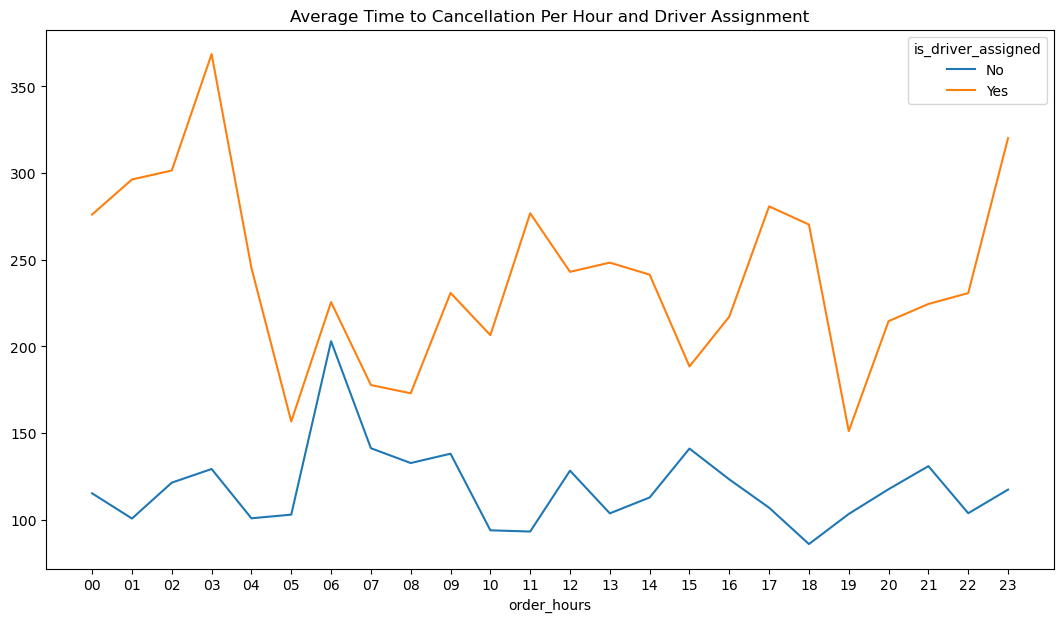

In [27]:
_ = grouped_q3.reset_index().pivot(index="order_hours",
                                  columns="is_driver_assigned",
                                  values="cancellations_time_in_seconds").plot(xticks=range(0, 24),
                                                                              figsize=(13, 7),
                                                                              title="Average Time to Cancellation Per Hour and Driver Assignment")

### Plot the distribution of average ETA by hours

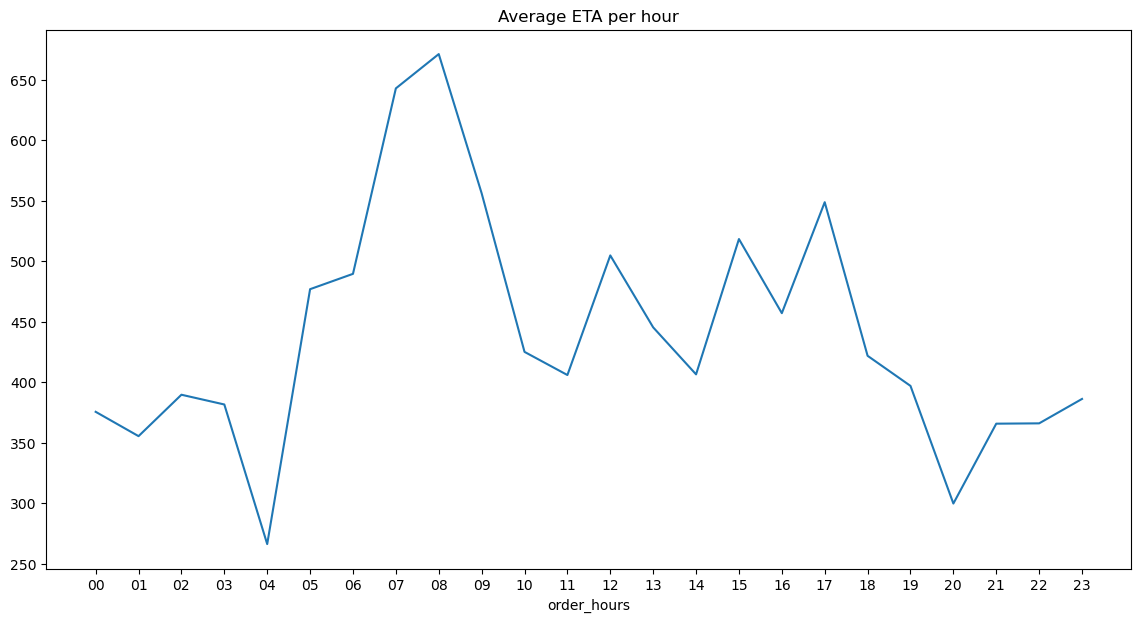

In [29]:
_ = df.groupby(by="order_hours")["m_order_eta"].mean().plot(figsize=(14, 7),
                                                           xticks=range(0, 24),
                                                           title="Average ETA per hour")